# Bepaling van warmtecapaciteit van een onbekend materiaal


In [2]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit 

# Introductie

Onbekende materialen kunnen geïdentificeerd worden door hun eigenschappen te meten. Een van deze eigenschappen is de warmtecapaciteit. In dit practicum gaan we de warmtecapaciteit van een onbekend materiaal bepalen door middel van een calorimeter experiment. Daarbij wordt een bepaalde massa van het materiaal naar een bekende temperatuur gebracht waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaatst. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend.

# Theorie

De soortelijke warmte $c$ van een materiaal is gedefinieerd als de hoeveelheid warmte $Q$ die nodig is om de temperatuur $T$ van een kilogram van het materiaal met één graad Celsius (of één Kelvin) te verhogen:

$$
    c = \frac{Q}{m \Delta T}
$$ (eq:heat_capacity)

Waarbij $Q$ de hoeveelheid warmte in Joules is, $m$ de massa in kilogram is en $\Delta T$ de verandering in temperatuur is. Gegeven de wet van Black, die stelt dat de totale hoeveelheid warmte in een geïsoleerd systeem constant blijft, kunnen we de warmte die het onbekende materiaal verliest gelijkstellen aan de warmte die het water opneemt:

$$
    Q_{materiaal} = -Q_{water} 
$$ (eq:black)

wanneer we de massa's en de begintemperaturen van beide systemen kennen, maar slechts een van de twee soortelijke warmtes, kunnen we de onbekende soortelijke warmte berekenen. We combineren vergelijkingen [](#eq:heat_capacity) en [](#eq:black) om de volgende vergelijking te krijgen:

$$
    T_e = \frac{c_w m_w T_{w,b}+c_m m_m T_{m,b}}{c_w m_w + c_m m_m}
$$ (eq:combined)

Waarbij de subscripts $b$ en $e$ respectievelijk staan voor begintoestand en eindtoestand, $w$ voor water en $m$ voor het onbekende materiaal.

Bij metingen aan verschillende massa's van het onbekende materiaal en vervolgens een least square fit aan bovenstaande vergelijking kunnen we een precieze waarde voor de soortelijke warmte van het onbekende materiaal bepalen. Dat is, wanneer de warmtecapaciteit van bijvoorbeeld de beker te verwaarlozen is.


# Methode en materialen

## Ontwerp
De bovenstaande theorie wordt gebruikt om de soortelijke warmte van een onbekend materiaal te bepalen. Het experiment bestaat uit het verwarmen van verschillende massa's van het onbekende materiaal tot een bekende temperatuur, waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaats. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend. Om de tijd voor het meten van meerdere materialen te reduceren, worden de data van de verschillende groepen in het lokaal samengevoegd. Van tevoren is afgesproken welke massa's door welke groep worden gemeten, en hoeveel water er gebruikt wordt.

## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Calorimeter
- Thermometer of temperatuursensor (±0.1K)
- Verwarmingsbron 
- Diverse massablokjes van onbekend materiaal
- Weegschaal (+/- 0.1 g)
- Water
- Maatcilinder ($250 \, \text{mL}$) of maatbeker ($400 \, \text{mL}$)
- Keukenpapier
- Lange steel


```{figure} figures/c_onbekend_setup.jpg
:width: 70%
:label: fig_c_onbekend_setup

Een schematische weergave van de opstelling
```


## Procedure
Bespreek wie welke massa's van het onbekende materiaal gaat meten.
Bespreek ook hoeveel water er gebruikt gaat worden.
Bepaal de begintemperaturen.
Hevel het aantal afgesproken massa's in de maatbeker. 
Roer voorzicht zodat de temperatuur homogeen is.
Noteer de hoogste gemeten temperatuur, dit is $T_e$.
Wissel de metingen uit met de andere groepen en voer de data-analyse uit.

Weeg vijf verschillende massa's van de onbekende stof nauwkeurig af en noteer deze ($m_{1}$ tot $m_{5}$ met onzekerheid +/- 0.0001 kg). Zorg voor een zo breed mogelijk bereik in massa's. Meet $250.0 \, \text{mL}$ water af met de maatcilinder en giet dit in het bekerglas. De hoeveelheid water in de maatcilinder moet niet te klein zijn, omdat er anders een grote systematsche fout wordt gemaakt door warmteverlies aan de lucht. De hoeveelheid water moet ook niet te groot zijn, omdat er anders geen homogene temperatuursverandering meetbaar is. Voor elke meting wordt vers $250.0 \, \text{mL}$ kraanwater gebruikt. Laat de onbekende stof lang genoeg in het verwarmingselement zodat deze een stabiele, bekende temperatuur bereikt. Je meet de begintemperatuur van het water met een thermometer en de begintemperatuur van de onbekende stof lees je af op het verwarmingselement (aanname: T_onbekende stof = T_water in verwarmingselement). Meet de temperatuur van de $250.0 \, \text{mL}$ water in het bekerglas vlak voor toevoeging en noteer deze, inclusief de onzekerheid van 0.1 K. Voeg, met een lange steel, de afgewogen massa van de onbekende stof zo snel en beheerst mogelijk toe aan het bekerglas om warmteverlies aan de omgeving tijdens deze stap te minimaliseren. Vervolgens roer je om gelijkmatige warmte-uitwisseling te garanderen. Zorg er hierbij voor dat de sensor vrij en stil in het water zweeft en dat de thermometer de massa of de bodem/wand niet raakt, om onjuiste lokale temperatuurmetingen te voorkomen. Blijf de temperatuur noteren totdat deze begint af te nemen na het bereiken van het maximum, of totdat de temperatuur stabiel is. De maximale temperatuur is $T_{\text{eind}}$. Noteer de onzekerheid van $\pm 0.01 \, \text{K}$. Nadat de eindtemperatuur is afgelezen, wordt de thermometer telkens gedroogd. Dit voorkomt dat waterresten van een eerdere meting de volgende meting beïnvloeden.  De meetresultaten vormen een dataset van massa's ($m$) en de bijbehorende eindtemperaturen ($T_{\text{eind}}$). Deze data worden geplot in de $(m, T_{\text{eind}})$-grafiek om de soortelijke warmte van de onbekende stof te bepalen door middel van curve-fitting.

```{note}
Hieronder staat een voorbeeld hoe je een grafiek moet opslaan en vervolgens in je document kunt oproepen.
Het voorbeeld kun je natuurlijk straks verwijderen.
```

# Resultaten


In [17]:
# Onzekerheden
u_massa = 0.0001 # kg
u_T = 0.1 # graden

# gegevens
T_onbekende_stof_start = 69.9 # graden

# eerste 3 metingen met circa 250 mL water
# meting 1
massa_maatbeker1 = 0.1456 #kg
massa_maatbeker_water1 = 0.3919 #kg
massa_water1 = massa_maatbeker_water1 - massa_maatbeker1
print("1. massa_water:", massa_water1, "kg")

T_water_start = 20.6 # graden
massa_onbekende_stof = 0.0388 # kg
T_water_eind = 21.4
delta_T = T_water_eind - T_water_start
print("1. delta_T:", delta_T)

#meting 2
massa_maatbeker2 = 0.1899 #kg
massa_maatbeker_water2 = 0.4290 #kg
massa_water2 = massa_maatbeker_water2 - massa_maatbeker2
print("2. massa_water:", massa_water2, "kg")

T_water_start = 20.5 # graden
massa_onbekende_stof = 0.0391 # kg
T_onbekende_stof_start = 69.9 # graden
T_water_eind = 21.4
delta_T = T_water_eind - T_water_start
print("2. delta_T:", delta_T)

# meting 3
massa_maatbeker3 = 0.1456 #kg
massa_maatbeker_water3 = 0.3869 #kg
massa_water3 = massa_maatbeker_water3 - massa_maatbeker3
print("3. massa_water:", massa_water3, "kg")

T_water_start = 19.2 # graden
massa_onbekende_stof = 0.0260 # kg
T_onbekende_stof_start = 69.9 # graden
T_water_eind = 20.1 # graden
delta_T = T_water_eind - T_water_start
print("3. delta_T:", delta_T)

1. massa_water: 0.24630000000000002 kg
1. delta_T: 0.7999999999999972
2. massa_water: 0.23909999999999998 kg
2. delta_T: 0.8999999999999986
3. massa_water: 0.24130000000000001 kg
3. delta_T: 0.9000000000000021


m_w_gem: 0.24223333333333333 kg
T_w_b_gem: 20.099999999999998 graden
c_m: 74.26820114832107 J/(kg * K)


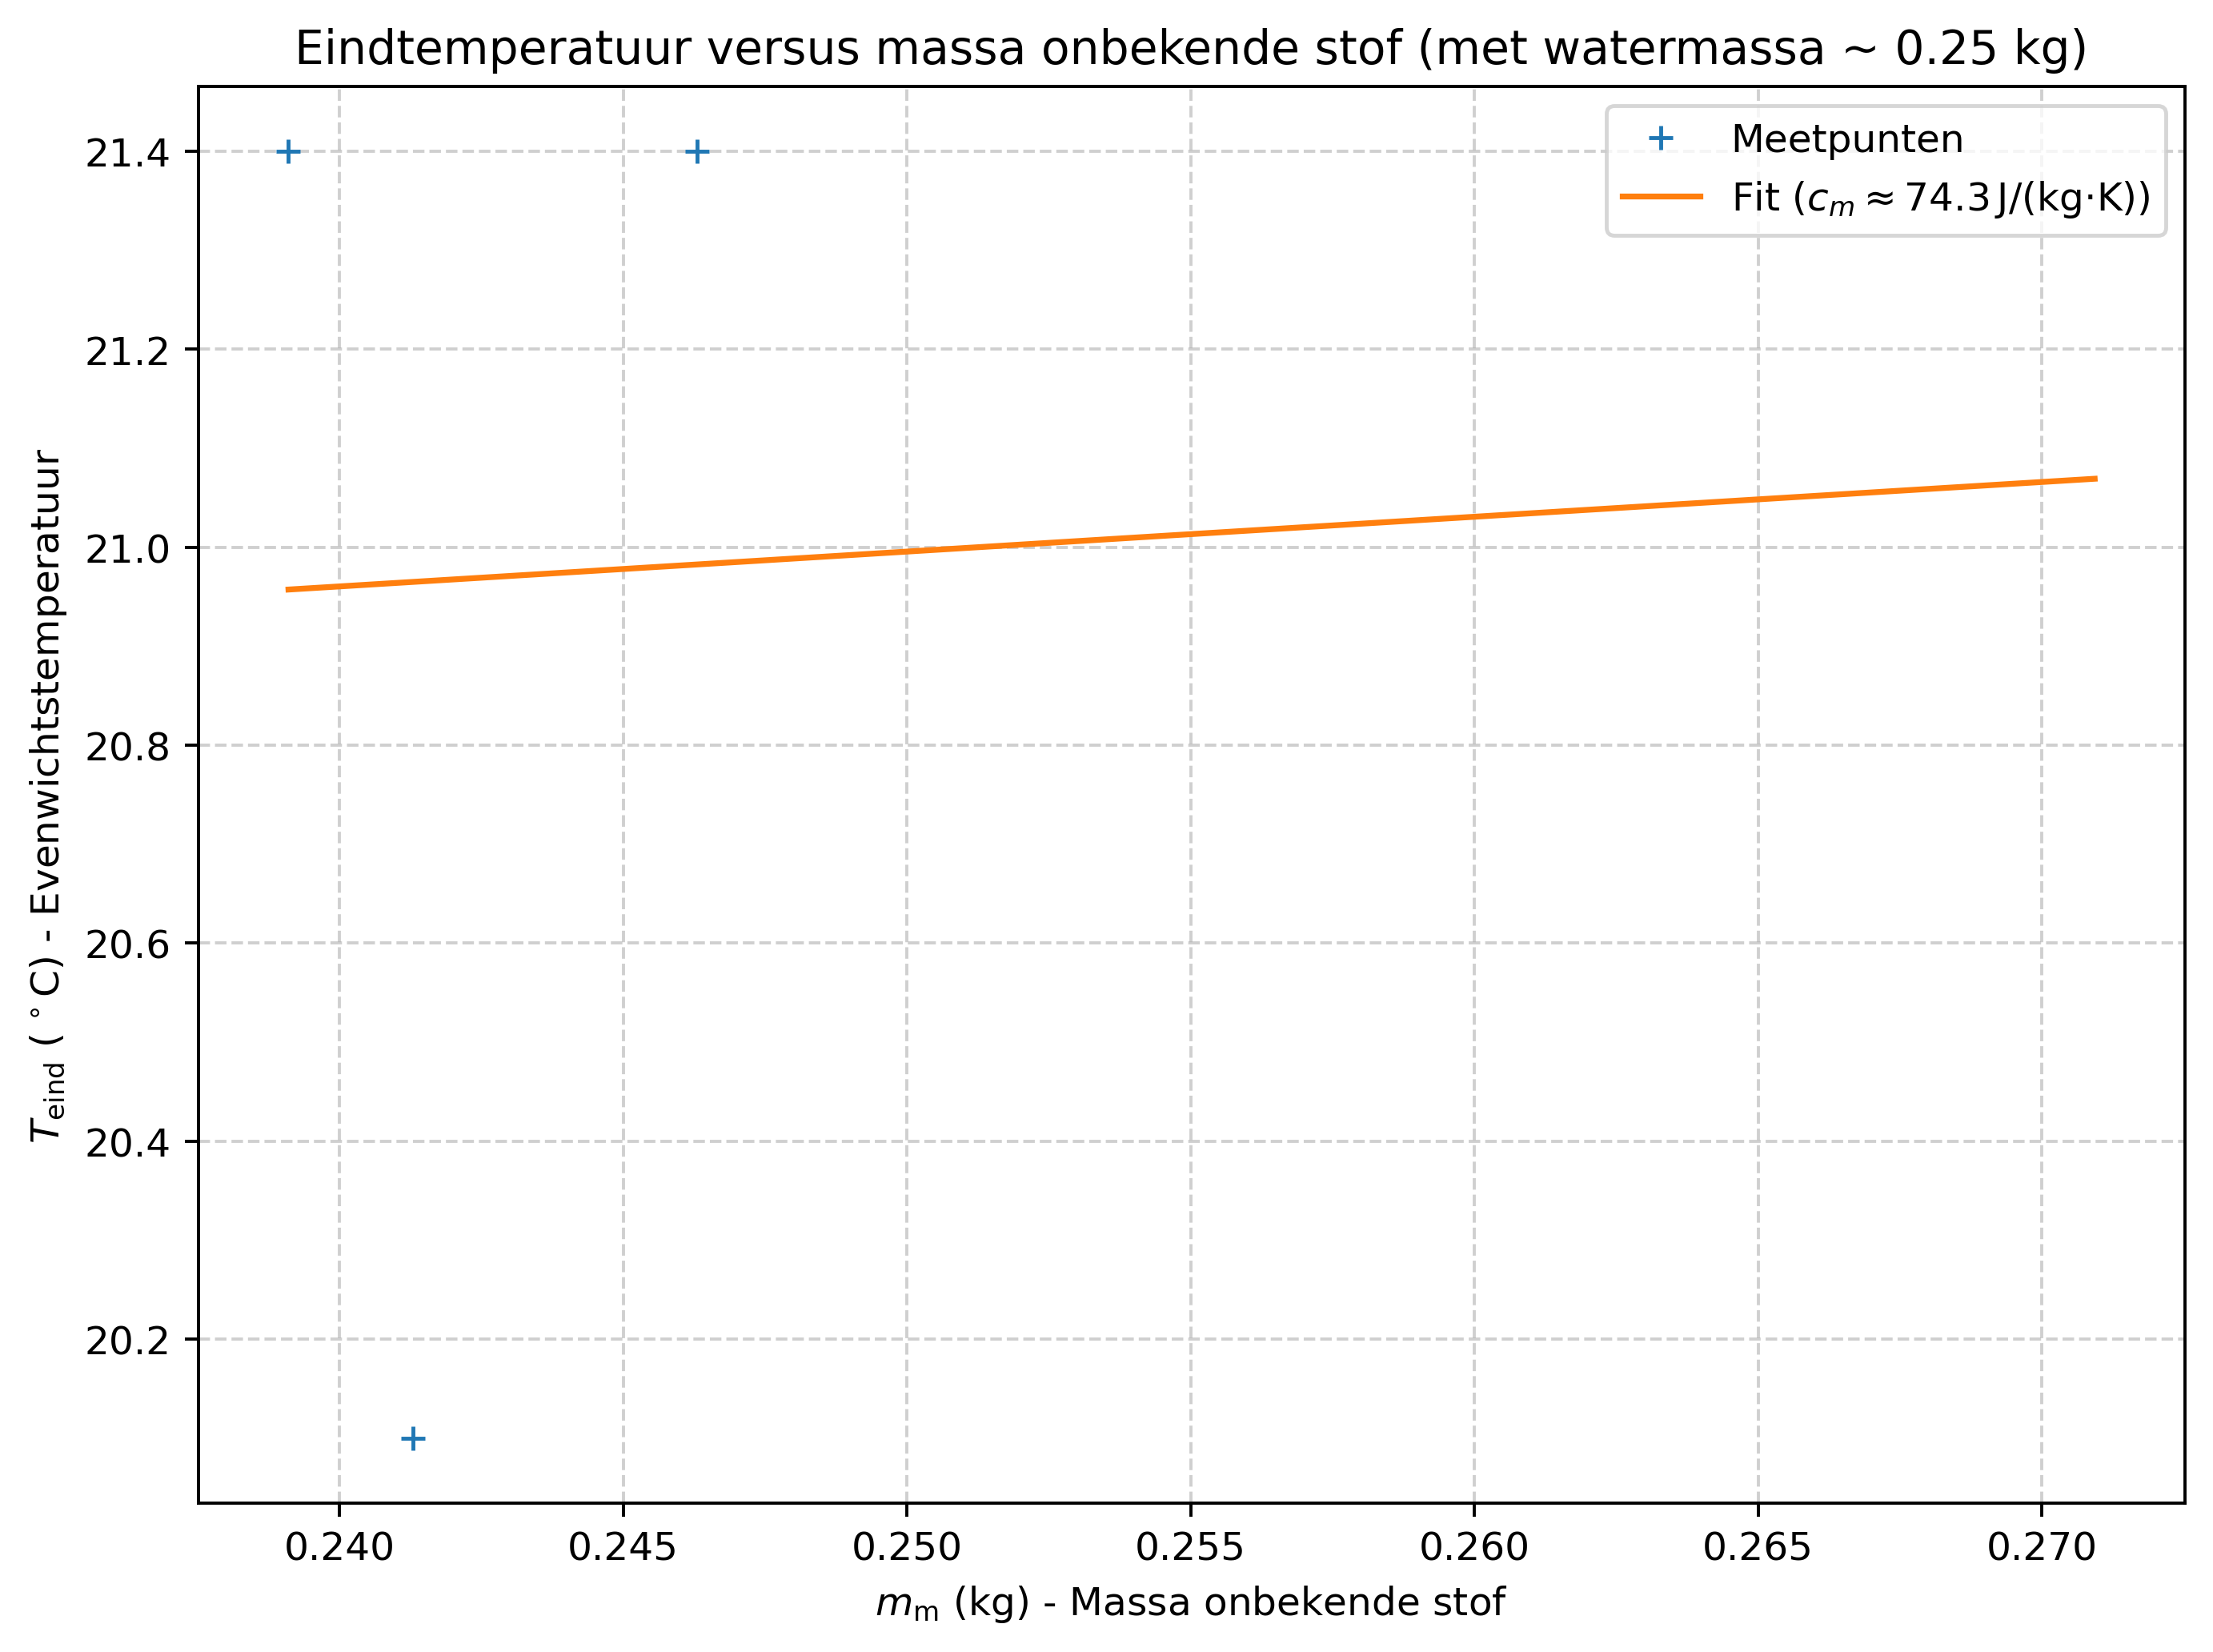

In [14]:
# eerste 3 metingen met circa 250 mL water
# berekening gemiddelde watermassa en begintemperatuur
m_w_gem = (massa_water1 + massa_water2 + massa_water3) / 3
print("m_w_gem:", m_w_gem, "kg")
T_w_b_gem = (20.6 + 20.5 + 19.2) /3
print("T_w_b_gem:", T_w_b_gem, "graden")

m_w_gem = 0.24223333333333333  # Massa water in kg
T_w_b_gem = 20.099999999999998  # Begintemperatuur water in graden

# DATA
m_onbekende_stof1 = np.array([0.24630000000000002, 0.23909999999999998, 0.2413000000000000])
T_eind1 = np.array([21.4, 21.4, 20.1])
soortelijke_warmte_water = 4186 # J/(kg * K)

# De functie neemt alleen de onafhankelijke variabele (m_m) en de fitte parameter (c_m) als argumenten
def function_fit(m_m, c_m):
    # Evenwichtstemperatuur: T_eind = (c_w * m_w * T_w_b + c_m * m_m * T_start_m) / (c_w * m_w + c_m * m_m)
    teller = soortelijke_warmte_water * m_w_gem * T_w_b_gem + c_m * m_m * T_onbekende_stof_start
    noemer = soortelijke_warmte_water * m_w_gem + c_m * m_m
    return teller / noemer

# c_m is nu de enige parameter, dus p0=[500] als initiële gok. Koper heeft bijv. c_m ~ 385 J/(kg*K)
values, pcov = curve_fit(function_fit, m_onbekende_stof1, T_eind1, p0=[500])        
c_m_fit = values[0] # c_m is nu de eerste gefitte parameter
print("c_m:", c_m_fit, "J/(kg * K)")

x_test = np.linspace(min(m_onbekende_stof1), max(m_onbekende_stof1)*1.1, 500)

plt.figure(figsize=(8, 6), dpi=350)
plt.xlabel('$m_{\\text{m}}$ (kg) - Massa onbekende stof')
plt.ylabel('$T_{\\text{eind}}$ ($\\,^\circ\\text{C}$) - Evenwichtstemperatuur')
plt.title('Eindtemperatuur versus massa onbekende stof (met watermassa ~ 0.25 kg)')
plt.plot(m_onbekende_stof1, T_eind1, '+', label='Meetpunten')
plt.plot(x_test, function_fit(x_test, c_m_fit), '-', label=f'Fit ($c_{{m}} \\approx {c_m_fit:.1f}\\, \\text{{J/(kg·K)}}$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("fitting_result.png")
plt.show()

In [16]:
# laatste 4 metingen met circa 50 mL water
# meting 4
massa_maatbeker = 0.0502 #kg
massa_maatbeker_water = 0.0990 #kg
massa_water = massa_maatbeker_water - massa_maatbeker
print("4. massa_water:", massa_water, "kg")

T_water_start = 19.9 # graden
massa_onbekende_stof = 0.0133 # kg
T_water_eind = 21.5 # graden
delta_T = T_water_eind - T_water_start
print("4. delta_T:", delta_T)

#meting 5
massa_maatbeker = 0.0326 #kg
massa_maatbeker_water = 0.0777 #kg
massa_water = massa_maatbeker_water - massa_maatbeker
print("5. massa_water:", massa_water, "kg")

T_water_start = 19.1 # graden
massa_onbekende_stof = 0.0262 # kg
T_water_eind = 21.9 # graden
delta_T = T_water_eind - T_water_start
print("5. delta_T:", delta_T)

#meting 6
massa_maatbeker = 0.0502 #kg
massa_maatbeker_water = 0.0945 #kg
massa_water = massa_maatbeker_water - massa_maatbeker
print("6. massa_water:", massa_water, "kg")

T_water_start = 19.6 # graden
massa_onbekende_stof = 0.0131 # kg
T_water_eind = 20.5 # graden
delta_T = T_water_eind - T_water_start
print("6. delta_T:", delta_T)

#meting 7
massa_maatbeker = 0.0326 #kg
massa_maatbeker_water = 0.0854 #kg
massa_water = massa_maatbeker_water - massa_maatbeker
print("7. massa_water:", massa_water, "kg")

T_water_start = 19.0 # graden
massa_onbekende_stof = 0.0654 # kg
T_water_eind = 25.1 # graden
delta_T = T_water_eind - T_water_start
print("7. delta_T:", delta_T)

4. massa_water: 0.0488 kg
4. delta_T: 1.6000000000000014
5. massa_water: 0.04510000000000001 kg
5. delta_T: 2.799999999999997
6. massa_water: 0.0443 kg
6. delta_T: 0.8999999999999986
7. massa_water: 0.05280000000000001 kg
7. delta_T: 6.100000000000001


m_w_gem: 0.04775000000000001 kg
T_w_b_gem: 19.4 graden
c_m: 488.8270134208572 J/(kg * K)


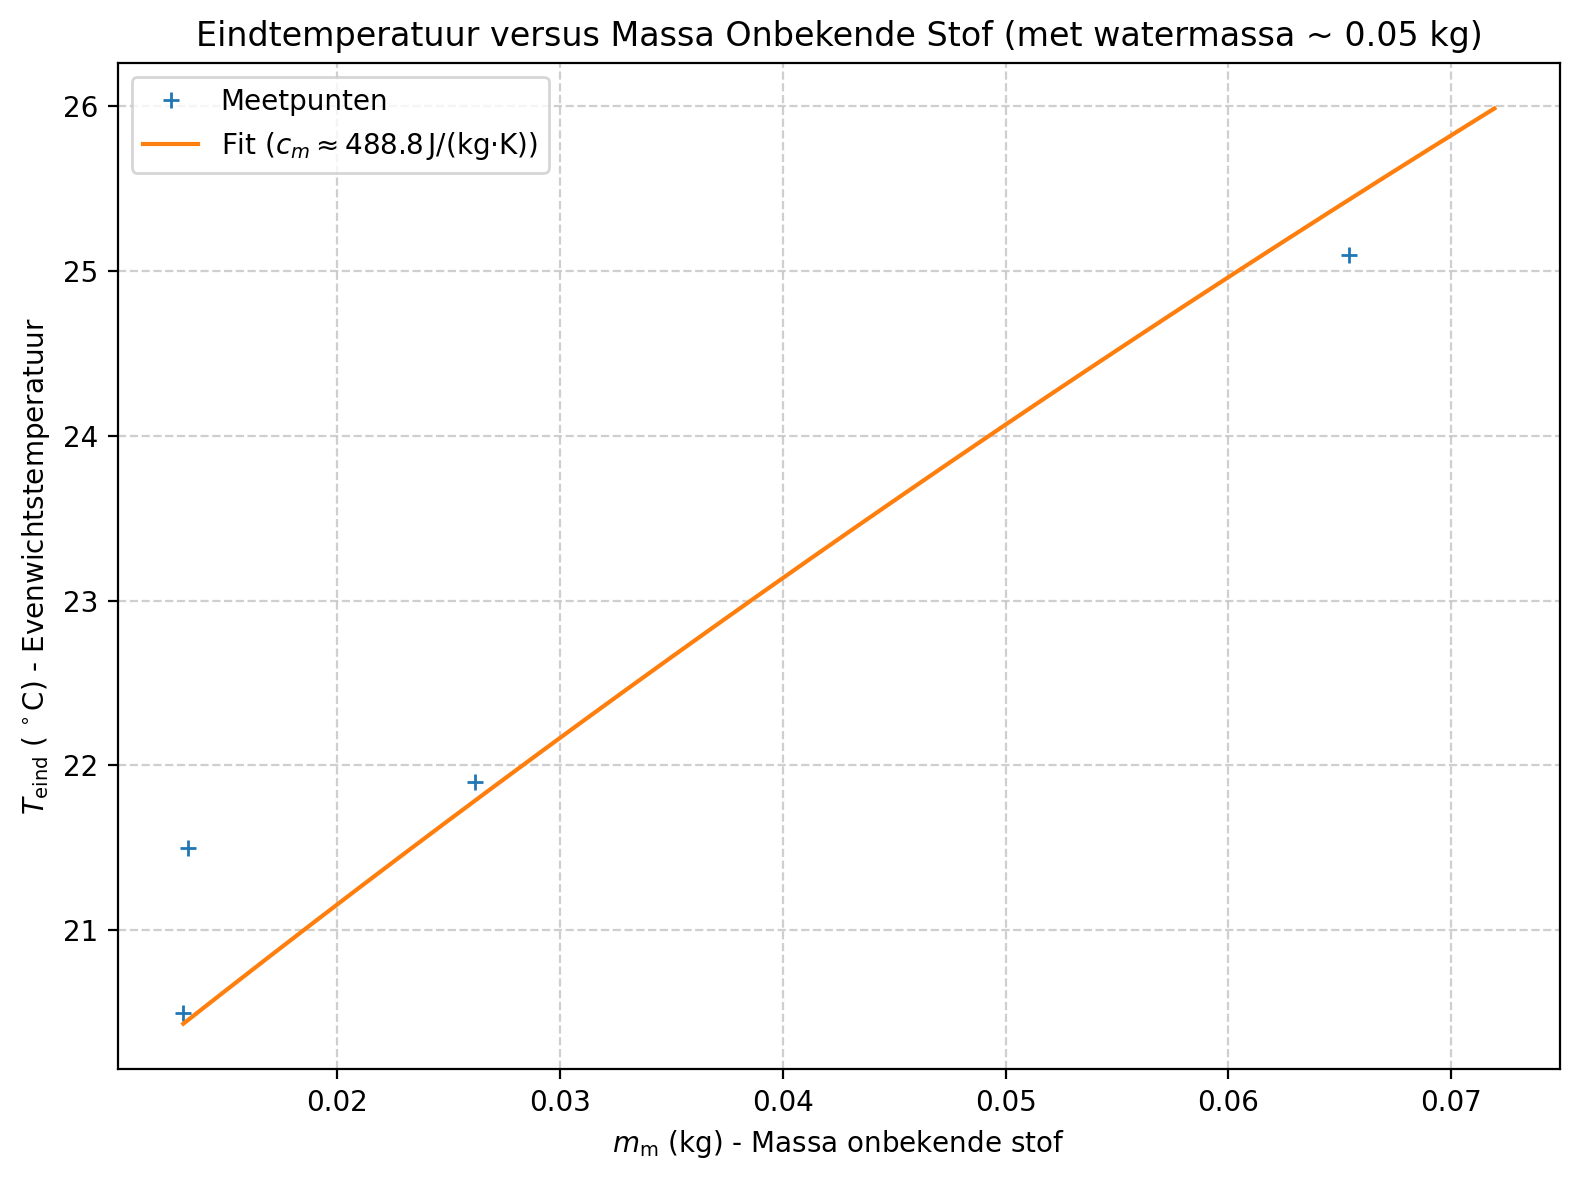

c_onbekend_meting_7: 460.15825688073414 J/(kg * K)


In [19]:
# Sla figuren op met  
# plt.savefig("Figuren/naam.png", dpi=450)
# waarbij naam vervangen wordt door de bestandsnaam. 
# Onderstaande voorbeeld code en output grafiek 
# Gemiddelde begintemperatuur en gemiddelde massa water berekening
m_w_gem = (0.0488 + 0.04510000000000001 + 0.0443 + 0.05280000000000001) / 4
print("m_w_gem:", m_w_gem, "kg")
T_w_b_gem = (19.9 + 19.1 + 19.6 + 19.0) /4
print("T_w_b_gem:", T_w_b_gem, "graden")

m_w_gem = 0.0528  # Massa water in kg
T_w_b_gem = 19.0  # Begintemperatuur water in graden

# DATA
m_onbekende_stof2 = np.array([0.0133, 0.0262, 0.0131, 0.0654])
T_eind2 = np.array([21.5, 21.9, 20.5, 25.1])

# c_m is nu de enige parameter, dus p0=[500] als initiële gok
values, pcov = curve_fit(function_fit, m_onbekende_stof2, T_eind2, p0=[500])
c_m_fit = values[0] # c_m is nu de eerste (en enige) gefitte parameter (index 0)
print("c_m:", c_m_fit, "J/(kg * K)")

x_test = np.linspace(min(m_onbekende_stof2), max(m_onbekende_stof2)*1.1, 500)

plt.figure(figsize=(8, 6), dpi=200)
plt.xlabel('$m_{\\text{m}}$ (kg) - Massa onbekende stof')
plt.ylabel('$T_{\\text{eind}}$ ($\\,^\circ\\text{C}$) - Evenwichtstemperatuur') # Correctie y-label
plt.title('Eindtemperatuur versus Massa Onbekende Stof (met watermassa ~ 0.05 kg)')
plt.plot(m_onbekende_stof2, T_eind2, '+', label='Meetpunten')
plt.plot(x_test, function_fit(x_test, c_m_fit), '-', label=f'Fit ($c_{{m}} \\approx {c_m_fit:.1f}\\, \\text{{J/(kg·K)}}$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("fitting_result.png")
plt.show()

# berekening soortelijke warmte onbekende stof alleen uit de meting 7
def c_bepaling(m_w,T_w_b, T_eind, m_m):
    return (4186 * m_w * (T_w_b - T_eind)) / (m_m * (T_eind - 69.9))

c_onbekend_meting_7 = c_bepaling(0.05280000000000001, 19.0, 25.1, 0.0654)
print("c_onbekend_meting_7:", c_onbekend_meting_7, "J/(kg * K)")

```{figure} figures/naam.png
:width: 50%
:label: fig_naam 

Hier is het onderschrift van de figuur.
```

# Discussie en conclusie

De belangrijkste aanname in de theorie – dat het systeem volledig geïsoleerd is ($Q_{\text{materiaal}} = -Q_{\text{water}}$) – wordt in de praktijk geschonden. Aangezien de warmtecapaciteit van de onbekende stof alleen wordt berekend aan de hand van de gemeten eindtemperatuur van het water, is het onzeker of alle warmte-afgifte van de onbekende stof is meegenomen in de berekening van de warmtecapaciteit. Een significant deel van de warmte zal via geleiding met de onderkant van het bekerglas en via straling ontsnappen. Een ander klein deel zal via waterdamp (vooral tijdens het moment van uit de verwarmingsbron halen en in het water leggen) de meetgrens overbruggen. Dit leidt tot een onderschatting van de werkelijke warmteoverdracht en leidt tot een systematische fout op de gemeten begintemperatuur. Ook zal er warmte ontsnappen via de thermometer, de tafel en het bekerglas. Het toevoegen van heet water dat aan het massablokje kleeft bij het overbrengen van de verwarmingsbron naar het bekerglas is een fout. Dit zorgt voor een systematische fout op zowel de eindtemperatuur ($T_{\text{eind}}$) als de massa van het water ($m_{\text{w}}$), waardoor de basisvoorwaarden van de berekening onjuist zijn. Voor vervolgonderzoek wordt aangeraden om een geïsoleerde calorimeter, in plaats van een bekerglas, te gebruiken om het water in te doen. Dit minimaliseert het warmteverlies aan de lucht, wat een belangrijke systematische fout is.
  
De thermometer werd, in strijd met de methode, op de bodem van het bekerglas gehouden. Er is een kans dat hierdoor geleidingswarmte van de maatcilinder is gemeten in plaats van de vloeistoftemperatuur. In vervolgexperimenten moet de sensor vrij en centraal in het water zweven, terwijl er continu wordt geroerd. Daarnaast is de temperatuurmeting mogelijk niet representatief voor de temperatuur van het gehele water vanwege lokale fluctuaties. Daarom wordt er aangeraden om een magnetische roerder en roervlo te gebruiken. Dit zorgt voor een constante, reproduceerbare roersnelheid en garandeert een meer homogene temperatuurverdeling. 

Verder is de accuraatheid van de thermometer en de weegschaal erg laag (weegschaal $\pm 0.1 \, \text{g}$ en temperatuursensor $\pm 0.1 \, \text{K}$). Deze laatste beperking heeft echter, relatief gezien, geen grote schadelijke bijdrage aan de uitkomst van het experiment.

Na uitvoering van de eerste drie metingen, is het meetplan lichtelijk aangepast. Het volume van het water is voor de laatste vier metingen circa 50 mL, i.p.v. 250 mL. Dit zorgt ervoor dat de temperatuursstijging beter te meten is. Het gebruik van de $T_{\text{eind}}$ data van de laatste vier metingen in de $\text{curve-fit}$ (waarbij $\mathbf{m_{\text{w}} = 0.0528 \, \text{kg}}$ en $\mathbf{T_{\text{w, b}} = 19.4 \, \text{C}}$ zijn gebruikt als constanten) resulteerde in $\mathbf{c_{\text{m}} \approx 449 \, \text{J}/(\text{kg}\cdot\text{K})}$.

Concluderend is de basisopstelling onvoldoende geïsoleerd, is de nauwkeurigheid van de meetapparatuur te laag, en kent de procedure te veel variabelen ($m_{\text{w}}$ en $T_{\text{w, b}}$) om een valide en precieze bepaling van de soortelijke warmte van een onbekende stof te garanderen. 